<a href="https://colab.research.google.com/github/OJB-Quantum/Qiskit-Metal-to-Litho/blob/main/High_Resolution_Lithography_Critical_Dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common Beam-Based and Direct-Write Lithography Critical Dimensions (High Resolution)

By Onri Jay Benally

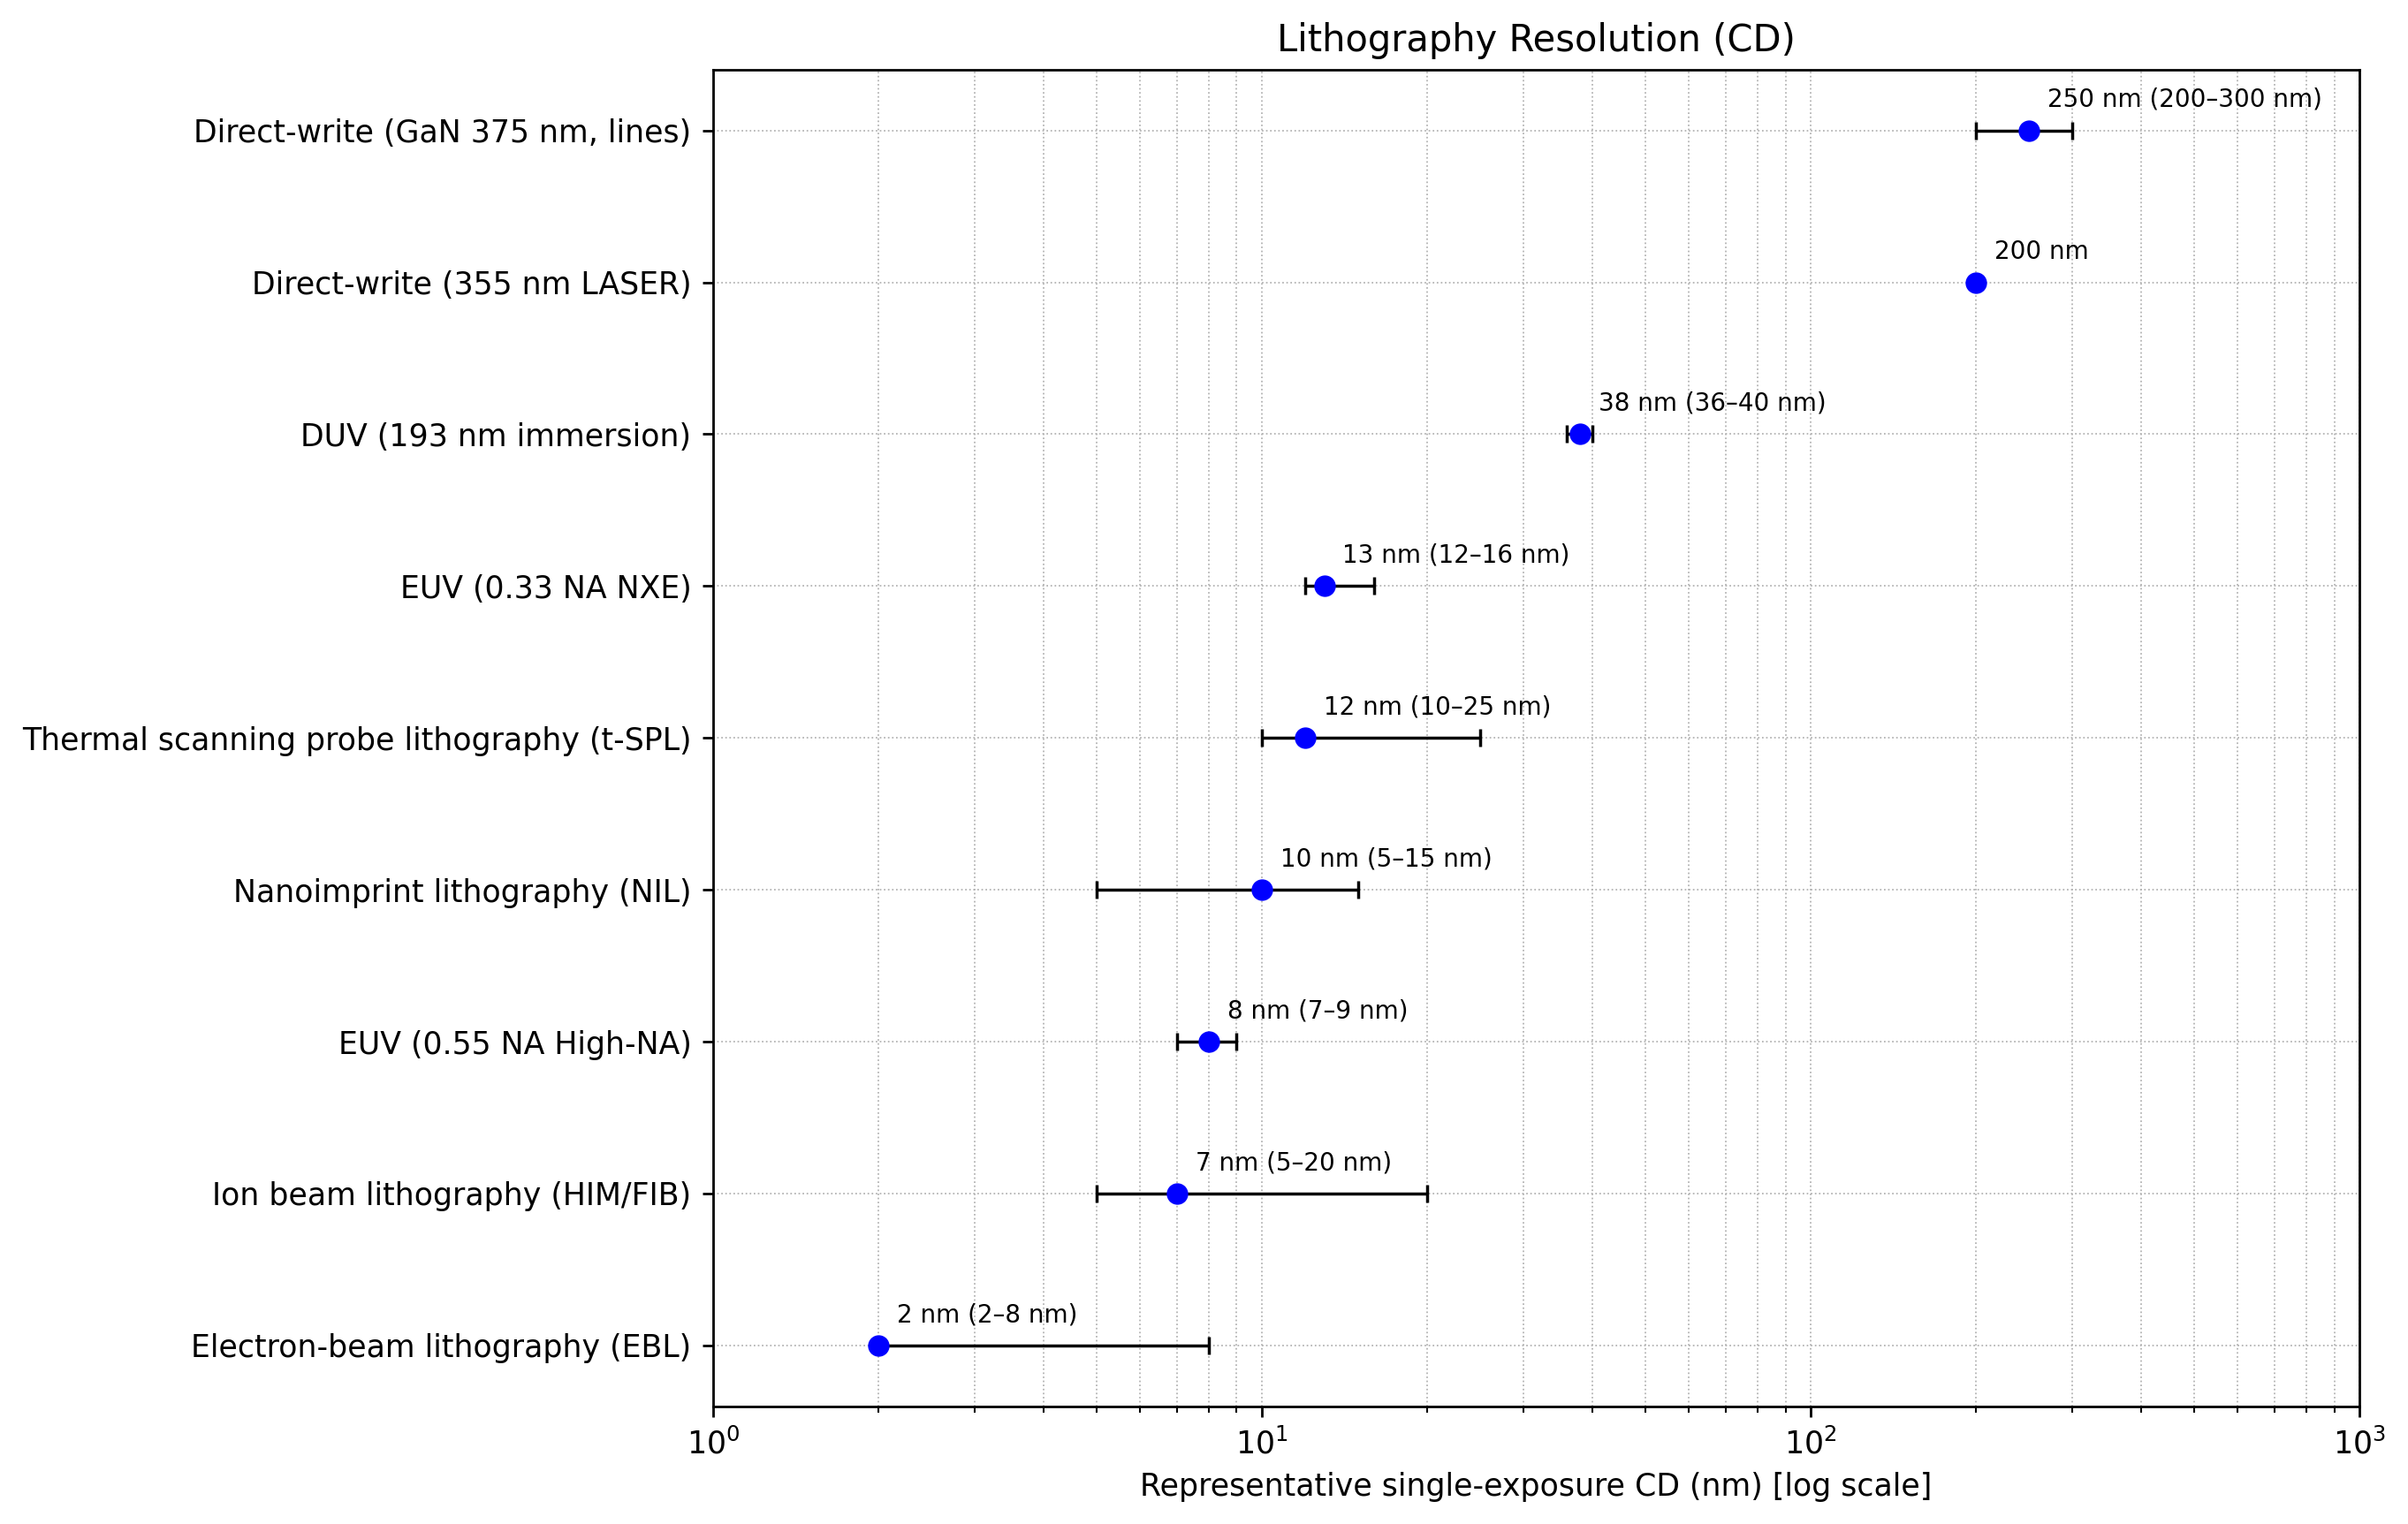

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

records = [
    {"Method": "Electron-beam lithography (EBL)", "Class": "Direct-write",
     "Center_CD_nm": 2.0, "Range_min_nm": 2.0, "Range_max_nm": 8.0,
     "Wavelength_or_NA": "e-beam (resist‑limited)",
     "Evidence": "2 nm isolated HSQ features; single-digit nm widely reported."},
    {"Method": "EUV (0.55 NA High-NA)", "Class": "Optical (13.5 nm)",
        "Center_CD_nm": 8.0, "Range_min_nm": 7.0, "Range_max_nm": 9.0,
        "Wavelength_or_NA": "λ = 13.5 nm, NA = 0.55",
        "Evidence": "ASML EXE High‑NA resolution near 8 nm."},
    {"Method": "EUV (0.33 NA NXE)", "Class": "Optical (13.5 nm)",
        "Center_CD_nm": 13.0, "Range_min_nm": 12.0, "Range_max_nm": 16.0,
        "Wavelength_or_NA": "λ = 13.5 nm, NA = 0.33",
        "Evidence": "NXE ~13 nm single‑exposure resolution."},
    {"Method": "Nanoimprint lithography (NIL)", "Class": "Imprint (UV)",
        "Center_CD_nm": 10.0, "Range_min_nm": 5.0, "Range_max_nm": 15.0,
        "Wavelength_or_NA": "UV imprint",
        "Evidence": "Sub‑10 nm replication; ≤15 nm spec reported."},
    {"Method": "DUV (193 nm immersion)", "Class": "Optical (193 nm)",
        "Center_CD_nm": 38.0, "Range_min_nm": 36.0, "Range_max_nm": 40.0,
        "Wavelength_or_NA": "λ = 193 nm, NA ≈ 1.35",
        "Evidence": "Single‑exposure near 40 nm half‑pitch."},
    {"Method": "Direct-write (355 nm LASER)", "Class": "Maskless laser",
        "Center_CD_nm": 200.0, "Range_min_nm": 200.0, "Range_max_nm": 200.0,
        "Wavelength_or_NA": "λ = 355 nm",
        "Evidence": "DWL 66+ XR mode ~200 nm."},
    {"Method": "Direct-write (GaN 375 nm, lines)", "Class": "Maskless laser/LED",
        "Center_CD_nm": 250.0, "Range_min_nm": 200.0, "Range_max_nm": 300.0,
        "Wavelength_or_NA": "λ = 375 nm",
        "Evidence": "Vendors cite 200–300 nm for lines with 375 nm optics."},
    {"Method": "Ion beam lithography (HIM/FIB)", "Class": "Direct-write",
        "Center_CD_nm": 7.0, "Range_min_nm": 5.0, "Range_max_nm": 20.0,
        "Wavelength_or_NA": "He+, Ne+, Ga+ (species‑dependent)",
        "Evidence": "He‑ion: 5 nm half‑pitch lines; fullerene resist 7.3 nm lines; Ga+ FIB ~20 nm features."},
    {"Method": "Thermal scanning probe lithography (t‑SPL)", "Class": "Probe lithography",
        "Center_CD_nm": 12.0, "Range_min_nm": 10.0, "Range_max_nm": 25.0,
        "Wavelength_or_NA": "Heated AFM‑type tip",
        "Evidence": "IBM: <10 nm lateral; ~11 nm half‑pitch after transfer; ~25 nm HP routine."},
]

df = pd.DataFrame.from_records(records).sort_values("Center_CD_nm").reset_index(drop=True)

# Prepare plotting data
ypos = np.arange(len(df))
x = df["Center_CD_nm"].to_numpy()
xerr = np.vstack([x - df["Range_min_nm"].to_numpy(),
                  df["Range_max_nm"].to_numpy() - x])

# Plot with shifted annotations
plt.figure(figsize=(11, 7), dpi=250)
plt.errorbar(
    x, ypos, xerr=xerr, fmt='o', capsize=3,
    ecolor='black', elinewidth=1.0,
    color='blue', markerfacecolor='blue', markeredgecolor='blue', markersize=6
)

def fmt_val(v):
    return f"{int(v)}" if v >= 1 else f"{v:.2f}"

# Shift labels upward by 6 typographic points
for xi, yi, rmin, rmax in zip(x, ypos, df["Range_min_nm"], df["Range_max_nm"]):
    if np.isclose(rmin, rmax):
        label = f"{fmt_val(xi)} nm"
    else:
        label = f"{fmt_val(xi)} nm ({fmt_val(rmin)}–{fmt_val(rmax)} nm)"
    plt.annotate(label, (xi, yi), xytext=(6, 6), textcoords="offset points",
                 ha='left', va='bottom', fontsize=8)

plt.yticks(ypos, df["Method"].tolist())
plt.xscale("log")
plt.xlim(1, 1000)  # extend down to 1 nm
plt.xlabel("Representative single‑exposure CD (nm) [log scale]")
plt.title("Lithography Resolution (CD)")
plt.grid(True, which='both', axis='x', linestyle=':', linewidth=0.5)
plt.grid(True, which='major', axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()

| Method                                     | Class              | Wavelength / NA                     | Center CD (nm) | Range min (nm) | Range max (nm) | Evidence note                                                                                                                   |
| ------------------------------------------ | ------------------ | ----------------------------------- | -------------: | -------------: | -------------: | ------------------------------------------------------------------------------------------------------------------------------- |
| Electron-beam lithography (EBL)            | Direct-write       | e-beam (resist-limited)             |              2 |              2 |              8 | Single-digit-nanometer features repeatedly demonstrated in HSQ/PMMA; isolated \~2 nm lines reported under optimized conditions. |
| EUV (0.55 NA High-NA)                      | Optical (13.5 nm)  | λ = 13.5 nm, NA = 0.55              |              8 |              7 |              9 | ASML EXE High-NA optics targeting \~8 nm single-exposure CDs; early tool and optics notes support a 7–9 nm window.              |
| Nanoimprint lithography (NIL)              | Imprint (UV)       | UV imprint                          |             10 |              5 |             15 | Sub-10 nm replication shown in research; stepper-class specifications commonly cite ≤15 nm with paths toward \~10 nm.           |
| EUV (0.33 NA NXE)                          | Optical (13.5 nm)  | λ = 13.5 nm, NA = 0.33              |             13 |             12 |             16 | Mainstream NXE scanners around \~13 nm single-exposure resolution with typical process windows near this value.                 |
| DUV (193 nm immersion)                     | Optical (193 nm)   | λ = 193 nm, NA ≈ 1.35               |             38 |             36 |             40 | Single-exposure practical limit near 40 nm half-pitch (Rayleigh), depending on k₁ and illumination.                             |
| Ion beam lithography (HIM/FIB)             | Direct-write       | He⁺ / Ne⁺ / Ga⁺ (species-dependent) |              7 |              5 |             20 | Helium-ion beams have printed \~5–8 nm features in suitable resists; Ga⁺ FIB commonly at \~20 nm scale.                         |
| Thermal scanning probe lithography (t-SPL) | Probe lithography  | Heated AFM-type tip                 |             12 |             10 |             25 | <10 nm lateral resolution in resist demonstrated; \~11 nm half-pitch after transfer; routine \~25 nm HP in production flows.    |
| Direct-write (355 nm LASER)                | Maskless laser     | λ = 355 nm                          |            200 |            200 |            200 | Research-grade laser writers specify \~200 nm minimum features in high-resolution modes.                                        |
| Direct-write (GaN 375 nm, lines)           | Maskless laser/LED | λ = 375 nm                          |            250 |            200 |            300 | Vendor documentation for 375 nm optics reports \~200–300 nm line CDs, with \~250 nm as a representative central value.          |


References:

1. ASML (2024) EUV lithography systems – products. Veldhoven: ASML.
2. ASML (2024) TWINSCAN EXE:5000 – EUV lithography systems. Veldhoven: ASML.
3. ASML (2024) 5 things you should know about High-NA EUV lithography. Veldhoven: ASML News, 25 January.
4. Fomenkov, I., et al. (2019) EUV source for lithography in HVM: performance and reliability. EUVL Symposium presentation.
5. Merriam, A.J. and Bethune, D.S. (2007) A solid-state 193 nm laser with high spatial coherence for sub-40 nm interferometric immersion lithography. Proceedings of SPIE, 6520, 65202Z.
6. Biswas, A.D., et al. (2004) Simulation of the 45-nm half-pitch node with 193-nm immersion lithography. Journal of Micro/Nanolithography, MEMS, and MOEMS, 3(1).
7. Manfrinato, V.R., Stein, A., Zhang, L., Nam, C.Y., Black, C.T. and Stach, E.A. (2017) Aberration-corrected electron-beam lithography at the one-nanometer length scale. Nano Letters.
8. Camino, F.E., Mizuno, N., Du, X. and Black, C.T. (2018) Single-digit nanometer electron-beam lithography with an aberration-corrected scanning transmission electron microscope. Journal of Visualized Experiments, e58272.
9. Manfrinato, V.R. (2015) Electron-beam lithography towards the atomic scale. Ph.D. thesis, Massachusetts Institute of Technology.
10. Winston, D., Cord, B.M., Ming, B., et al. (2009) Scanning-helium-ion-beam lithography with hydrogen silsesquioxane resist. Journal of Vacuum Science & Technology B, 27(6), 2702–2706.
11. Li, L., et al. (2012) Nanometer patterning by focused helium ion beam. Journal of Vacuum Science & Technology B, 30(6).
12. Shi, X. and Wolf, B. (2016) Helium ion beam lithography using fullerene molecular resists. Microelectronic Engineering, 155, 74–81.
13. Sreenivasan, S.V. (2017) Nanoimprint lithography steppers for volume fabrication of leading-edge semiconductor integrated circuits. Microsystems & Nanoengineering, 3, 17075.
14. Canon Inc. (2023) Nanoimprint lithography. Tokyo: Canon Inc. (Technology overview).
15. Canon Inc. (2024) FPA-1200NZ2C nanoimprint stepper (product page). Tokyo: Canon Inc. (
16. Canon U.S.A. (2024) FPA-1200NZ2C nanoimprint lithography systems for fine patterning: Specifications. Melville, NY: Canon U.S.A.
17. Heidelberg Instruments (2021) DWL 66+ – fact sheet (375 nm/405 nm). Heidelberg: Heidelberg Instruments Mikrotechnik GmbH.&#x20;
18. Optica (2025) Heidelberg Instruments enhances DWL 66+ lithography system, achieving 200 nm resolution and 65,536 grayscale levels. Washington, DC: Optica Corporate Member News.
19. Heidelberg Instruments (2023) VPG 300 DI data sheet (355 nm laser mask writer). Heidelberg: Heidelberg Instruments Mikrotechnik GmbH.
20. Heidelberg Instruments (n.d.) VPG 300 DI maskless stepper (product page). Heidelberg: Heidelberg Instruments Mikrotechnik GmbH.
21. 4PICO B.V. (2016) PicoMaster 200 – datasheet (375 nm direct-write lithography). Katwijk, The Netherlands: 4PICO.
22. Cho, Y.K.R., Kim, T., Lee, H. and Park, I. (2017) Sub-10 nm feature size in silicon using thermal scanning probe lithography. ACS Nano, 11(1), 118–124.
